# Part 1.1 : Logistic Regression from scratch

## Importing data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('data/divorce.csv', ';')
data

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [13]:
# Inserting a column
data.insert(loc = 0, column = 'w0', value = random.random())
data

,w0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,0.171715,2,2,4,1,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,0.171715,4,4,4,4,4,0,0,4,4,...,2,2,3,4,4,4,4,2,2,1
2,0.171715,2,2,2,2,1,3,2,1,1,...,3,2,3,1,1,1,2,2,2,1
3,0.171715,3,2,3,2,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,0.171715,2,2,1,1,1,1,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.171715,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0.171715,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,0.171715,1,1,0,0,0,0,0,0,0,...,3,0,2,0,1,1,3,0,0,0
168,0.171715,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


## Making X and Y arrays

In [14]:
X = np.asarray(data.iloc[:, :55])
Y = np.asarray(data["Class"])

In [15]:
print(X.shape)
X

(170, 55)


array([[0.1717154, 2.       , 2.       , ..., 3.       , 2.       ,
        1.       ],
       [0.1717154, 4.       , 4.       , ..., 4.       , 2.       ,
        2.       ],
       [0.1717154, 2.       , 2.       , ..., 2.       , 2.       ,
        2.       ],
       ...,
       [0.1717154, 1.       , 1.       , ..., 3.       , 0.       ,
        0.       ],
       [0.1717154, 0.       , 0.       , ..., 4.       , 3.       ,
        1.       ],
       [0.1717154, 0.       , 0.       , ..., 3.       , 3.       ,
        1.       ]])

In [16]:
print(Y.shape)
Y

(170,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

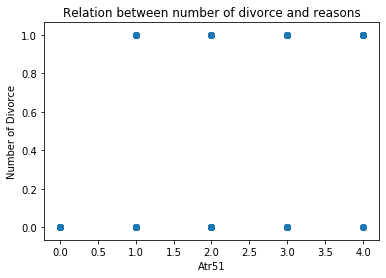

In [17]:
attr = 'Atr51'
plt.scatter(data[attr], Y)
plt.title('Relation between number of divorce and reasons')
plt.xlabel(attr)
plt.ylabel('Number of Divorce')
plt.show()

### Splitting test and train data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [19]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = Y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = Y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==Y_train.shape[0] and X_test.shape[0]==Y_test.shape[0]), "Check your splitting carefully"

X_train: (144, 55) , y_train: (144,)
X_test: (26, 55) , y_test: (26,)


## Making the Model
### Prediction Function

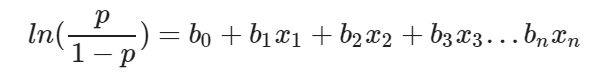

Here the term p/(1−p) is known as the odds and denotes the likelihood of the event taking place. Thus ln(p/(1−p)) is known as the log odds and is simply used to map the probability that lies between 0 and 1 to a range between (−∞,+∞). The terms b0, b1, b2… are parameters (or weights) that we will estimate during training.

### Loss Function

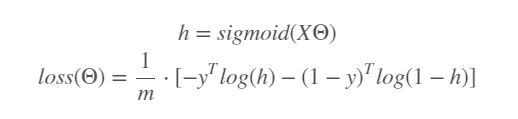

Where:
1. m = the number of samples
2. y = the target class

### Gradient Ascent

In [12]:
class LogisticRegression:
    
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.likelihoods = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7
        
    def pred(self, co, X):
        y_pred = np.dot(X, co)
        
        y_hat = 1 / (1 + np.exp(-y_pred))
        assert (y_pred.shape==y_hat.shape)
        
        return y_hat
    
    def likelihood_est(self, Y, y_pred):
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))

        # Considering the opposite of -ve log likelihood/cross entropy loss
        likelihood = ((Y*np.log(y_pred)) + ((1-Y)*np.log(1-y_pred))).mean()

        return likelihood
    
    def fit(self, X, Y):
        self.coeff = np.random.rand((X.shape[1]))
        
        for i in range(self.epochs):
            
            y_pred = self.pred(self.coeff, X)

            # Vectorized way of updating the gradients
            gradient = np.mean((Y-y_pred) * X.T, axis=1)

            self.coeff = self.coeff + self.learning_rate*gradient
            
            likelihood = self.likelihood_est(Y, y_pred)
            
            self.likelihoods.append(likelihood)
            
    def predict_probability(self, X):
        if (self.coeff.all() == None):
            raise Exception('Fit the model before prediction')
            
        probabs = self.pred(self.coeff, X)
        
        return probabs
    
    def predict(self, X, threshold=0.5):
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_probability(X))))
        
        return binary_predictions

In [13]:
model = LogisticRegression()

In [14]:
# To fit the model
likelihood = model.fit(X_train, Y_train)

### Checking it on data

In [15]:
# Train log-likelihood
train_log_likelihood = model.likelihood_est(Y_train, model.predict_probability(X_train))
print("Log-likelihood on training data:", train_log_likelihood)

Log-likelihood on training data: -0.059257844252924206


In [16]:
# Test log-likelihood
test_log_likelihood = model.likelihood_est(Y_test, model.predict_probability(X_test))
print("Log-likelihood on testing data:", test_log_likelihood)

Log-likelihood on testing data: -0.03705342245013343


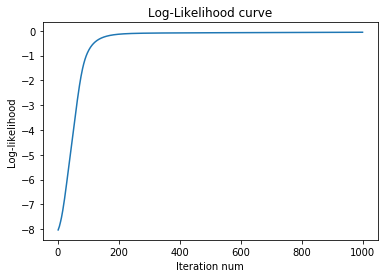

In [17]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

### Accuracy

In [18]:
#Make predictions on test data
y_pred = model.predict(X_test)

In [19]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, )
        y_pred : Predicted binary values (num_examples, )
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    
    accuracy = np.equal(y_true,y_pred).mean()
    ### END CODE HERE
    return accuracy

In [20]:
# Print accuracy on train data
y_pred = model.predict(X_train)
print(accuracy(Y_train,y_pred))

0.9791666666666666


In [21]:
# Print accuracy on test data
y_pred = model.predict(X_test)
print(accuracy(Y_test,y_pred))

0.9615384615384616


# Part 1.2: Logistic Regression from sklearn on the same dataset¶


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
X = np.asarray(data.iloc[:, :55])
Y = np.asarray(data["Class"])

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [28]:
test_accuracy_sklearn = model.score(X_test, y_pred)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 1.0
